## Calculating the deviations due to a binary lens at a specific coordinate origin
#### To minimize deviations at low magnfications, try:
$\xi \rightarrow \xi + \dfrac{q}{(1+q)(s+s^{-1})}$

#### Importing libraries

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import time as t
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

init_time = t.time()
from IRSMicroLensing import IRSCaustics as IRSC
from IRSMicroLensing import IRSFunctions as IRSF
print(f'Custom library import time: {(t.time() - init_time):.3} seconds')

import VBMicrolensing

Custom library import time: 1.99 seconds


#### Defining and initializing VBMicrolensing

In [2]:
VBM = VBMicrolensing.VBMicrolensing()

# Set relative accuracy
VBM.RelTol = 1e-03

# Set accuracy
VBM.Tol=1e-03

#### Importing all simulations and checking parameters

In [4]:
# Single lens
single_lens = IRSC.caustic_reader('../Unity/Simulations/Collection_0.8/single_1e11.pkl')

# Binary lens
binary_lens = IRSC.caustic_reader('../Unity/Simulations/Collection_0.8/binary_1e11.pkl')

# All triple lens
alphas = [0, 45, 90, 135, 180]
offset_type = ['', '_binary_offset', '_cm']
triple_lenses = []

for offset in offset_type:
    for alpha in alphas:
        file_path = f'../Unity/Simulations/Collection_0.8/triple_1e11_{alpha}_1e-06{offset}.pkl'
        print(file_path)
        triple_lenses.append(IRSC.caustic_reader(file_path))

../Unity/Simulations/Collection_0.8/triple_1e11_0_1e-06.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_45_1e-06.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_90_1e-06.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_135_1e-06.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_180_1e-06.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_0_1e-06_binary_offset.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_45_1e-06_binary_offset.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_90_1e-06_binary_offset.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_135_1e-06_binary_offset.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_180_1e-06_binary_offset.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_0_1e-06_cm.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_45_1e-06_cm.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_90_1e-06_cm.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_135_1e-06_cm.pkl
../Unity/Simulations/Collection_0.8/triple_1e11_180_1e-06_cm.p

#### Checking parameters

In [5]:
print(f'Angular width of single lens: {single_lens.ang_width}')
print(f'Angular width of binary lens: {binary_lens.ang_width}')

ang_width = single_lens.ang_width
pixels = single_lens.pixels

print(binary_lens.lens_att)
print(triple_lenses[5].lens_att)
# for triple_lens in triple_lenses:
#     print(triple_lens.lens_att)

Angular width of single lens: 0.07680319680319682
Angular width of binary lens: 0.07680319680319682
[[-4.87317560e-04  0.00000000e+00  1.00000000e+00]
 [ 7.99512682e-01  0.00000000e+00  1.00000000e-03]]
[[-4.87317560e-04  0.00000000e+00  1.00000000e+00]
 [ 7.99512682e-01  0.00000000e+00  1.00000000e-03]
 [ 7.99512682e-01  0.00000000e+00  1.00000000e-06]]


#### Plotting all simulations

Plotting magnification map: 0.113 seconds
Plotting magnification map: 0.028 seconds


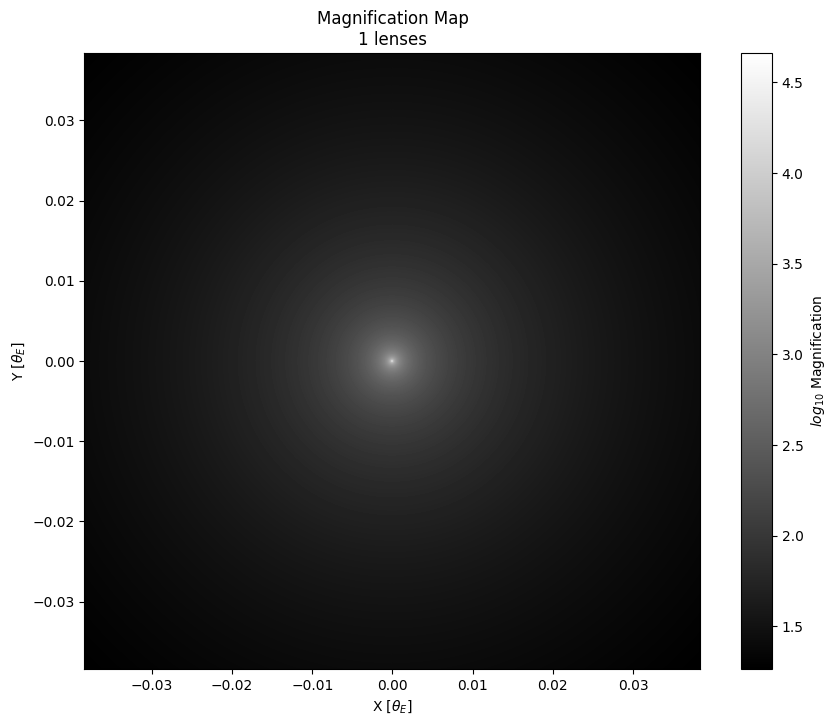

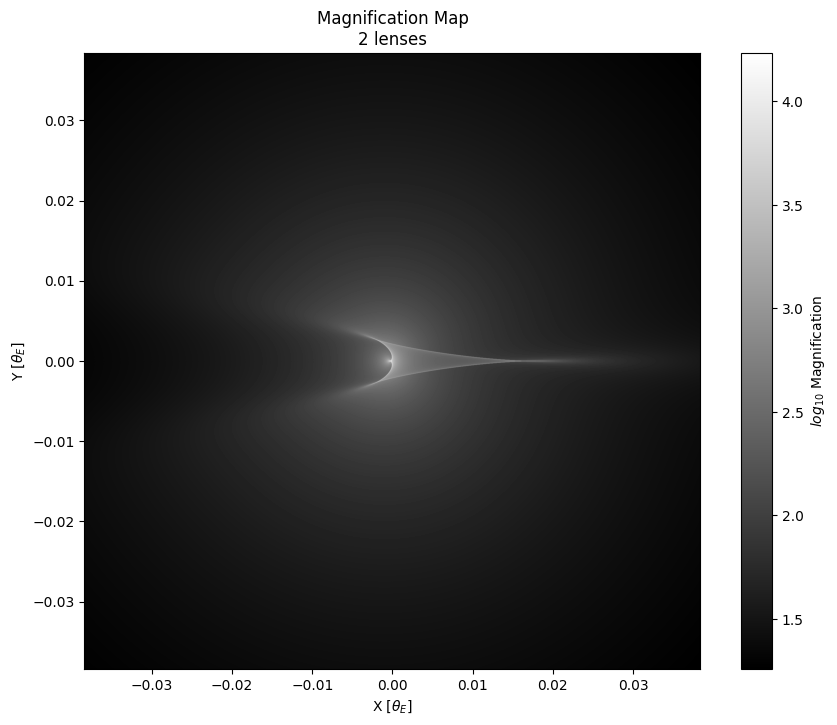

In [6]:
# Single lens
single_lens.plot()

# Binary lens
binary_lens.plot()

#### Calculating VBMicrolensing caustic

In [7]:
all_caustic_points = []

for triple_lens in triple_lenses:
    parameters = [item for sublist in triple_lens.lens_att for idx, item in enumerate(sublist)]
    print(parameters)
    VBM.SetLensGeometry(parameters)

    caustic_points = VBM.Multicaustics()

    all_caustic_points.append(caustic_points)

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot()

# all_cusp_xs = []
# all_cusp_ys = []
# all_min_indices = []
# all_min_distances = []

# for points in caustic_points:
#     ax.plot(points[0], points[1])
#     xs, ys = IRSF.IRSFunctions.find_cusp_points(np.array(points))
    
#     xs = np.array(xs)
#     ys = np.array(ys)

#     all_cusp_xs.append(xs)
#     all_cusp_ys.append(ys)

#     cusp_distances = np.sqrt(xs**2 + ys**2)
#     min_indices = np.argmin(cusp_distances)

#     all_min_distances.append(cusp_distances[min_indices])
#     all_min_indices.append(min_indices)

# min_ind = np.argmin(np.array(all_min_distances))

# print(all_cusp_xs[min_ind][all_min_indices[min_ind]], all_cusp_ys[min_ind][all_min_indices[min_ind]])

# big_caustic_xs = np.array(caustic_points[min_ind][0])
# big_caustic_ys = np.array(caustic_points[min_ind][1])

# ax.set_xlim(-ang_width/4, ang_width/4)
# ax.set_ylim(-ang_width/4, ang_width/4)
# ax.set_aspect('equal')

# plt.show()

[np.float64(-0.00048683121707560685), np.float64(0.0), np.float64(1.0), np.float64(0.7995131687829244), np.float64(0.0), np.float64(0.001), np.float64(0.7995131687829244), np.float64(0.0), np.float64(1e-06)]
[np.float64(-0.00048683107434374087), np.float64(-3.445852070273171e-10), np.float64(1.0), np.float64(0.7995131689256563), np.float64(-3.445852070273171e-10), np.float64(0.001), np.float64(0.5651985938748944), np.float64(0.5656854246046528), np.float64(1e-06)]
[np.float64(-0.0004868307297585338), np.float64(-4.873170731712404e-10), np.float64(1.0), np.float64(0.7995131692702415), np.float64(-4.873170731712404e-10), np.float64(0.001), np.float64(-0.0004868307297584848), np.float64(0.799999999512683), np.float64(1e-06)]
[np.float64(-0.0004868303851733267), np.float64(-3.445852070273171e-10), np.float64(1.0), np.float64(0.7995131696148268), np.float64(-3.445852070273171e-10), np.float64(0.001), np.float64(-0.5661722553344113), np.float64(0.5656854246046529), np.float64(1e-06)]
[np.flo

#### Defining source parameters

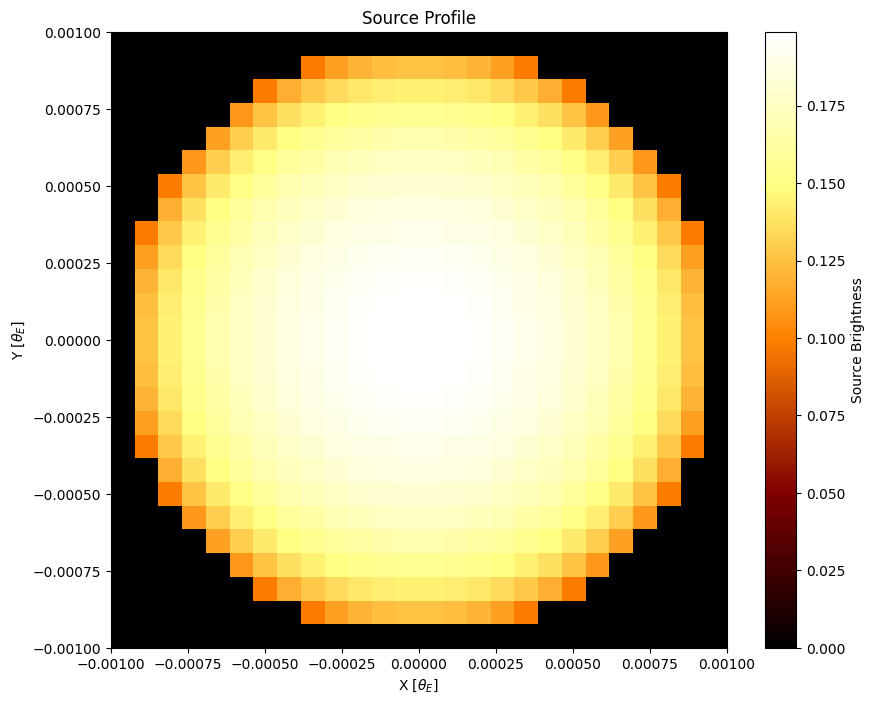

In [27]:
radius = 1e-3
LD = 0.5

source_profile = IRSF.IRSFunctions.source_profile(ang_res=single_lens.param_dict['ang_res'], rad=radius, profile_type='LD', LD=LD)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

img = ax.imshow(source_profile, cmap='afmhot', extent=[-radius, radius, -radius, radius])
plt.colorbar(img, ax=ax, label='Source Brightness')

ax.set_xlabel('X [$\\theta_E$]')
ax.set_ylabel('Y [$\\theta_E$]')
ax.set_title('Source Profile')

ax.set_aspect('equal')

plt.show()

#### Convolving all lens configurations

In [28]:
# Single lens
convolved_single_lens = single_lens.convolve(source_profile=source_profile)

# Binary lens
convolved_binary_lens = binary_lens.convolve(source_profile=source_profile)

# All triple lenses
convolved_triple_lenses = []

for triple_lens in triple_lenses:
    convolved_triple_lenses.append(triple_lens.convolve(source_profile=source_profile))

Convolving source profile with magnification map: 0.199 seconds
Convolving source profile with magnification map: 0.111 seconds
Convolving source profile with magnification map: 0.115 seconds
Convolving source profile with magnification map: 0.113 seconds
Convolving source profile with magnification map: 0.113 seconds
Convolving source profile with magnification map: 0.115 seconds
Convolving source profile with magnification map: 0.114 seconds
Convolving source profile with magnification map: 0.114 seconds
Convolving source profile with magnification map: 0.123 seconds
Convolving source profile with magnification map: 0.126 seconds
Convolving source profile with magnification map: 0.116 seconds
Convolving source profile with magnification map: 0.125 seconds
Convolving source profile with magnification map: 0.205 seconds
Convolving source profile with magnification map: 0.122 seconds
Convolving source profile with magnification map: 0.116 seconds
Convolving source profile with magnifica

#### Calculating fractional deviations from single and binary for all triple lens configurations

In [29]:
# Single lens deviations
fractional_deviation_single = []

# Binary lens deviations
fractional_deviation_binary = []

for convolved_triple_lens in convolved_triple_lenses:
    fractional_deviation_single.append( (convolved_triple_lens - convolved_single_lens)/convolved_single_lens )
    fractional_deviation_binary.append( (convolved_triple_lens - convolved_binary_lens)/convolved_binary_lens )

#### Plotting all fractional deviations

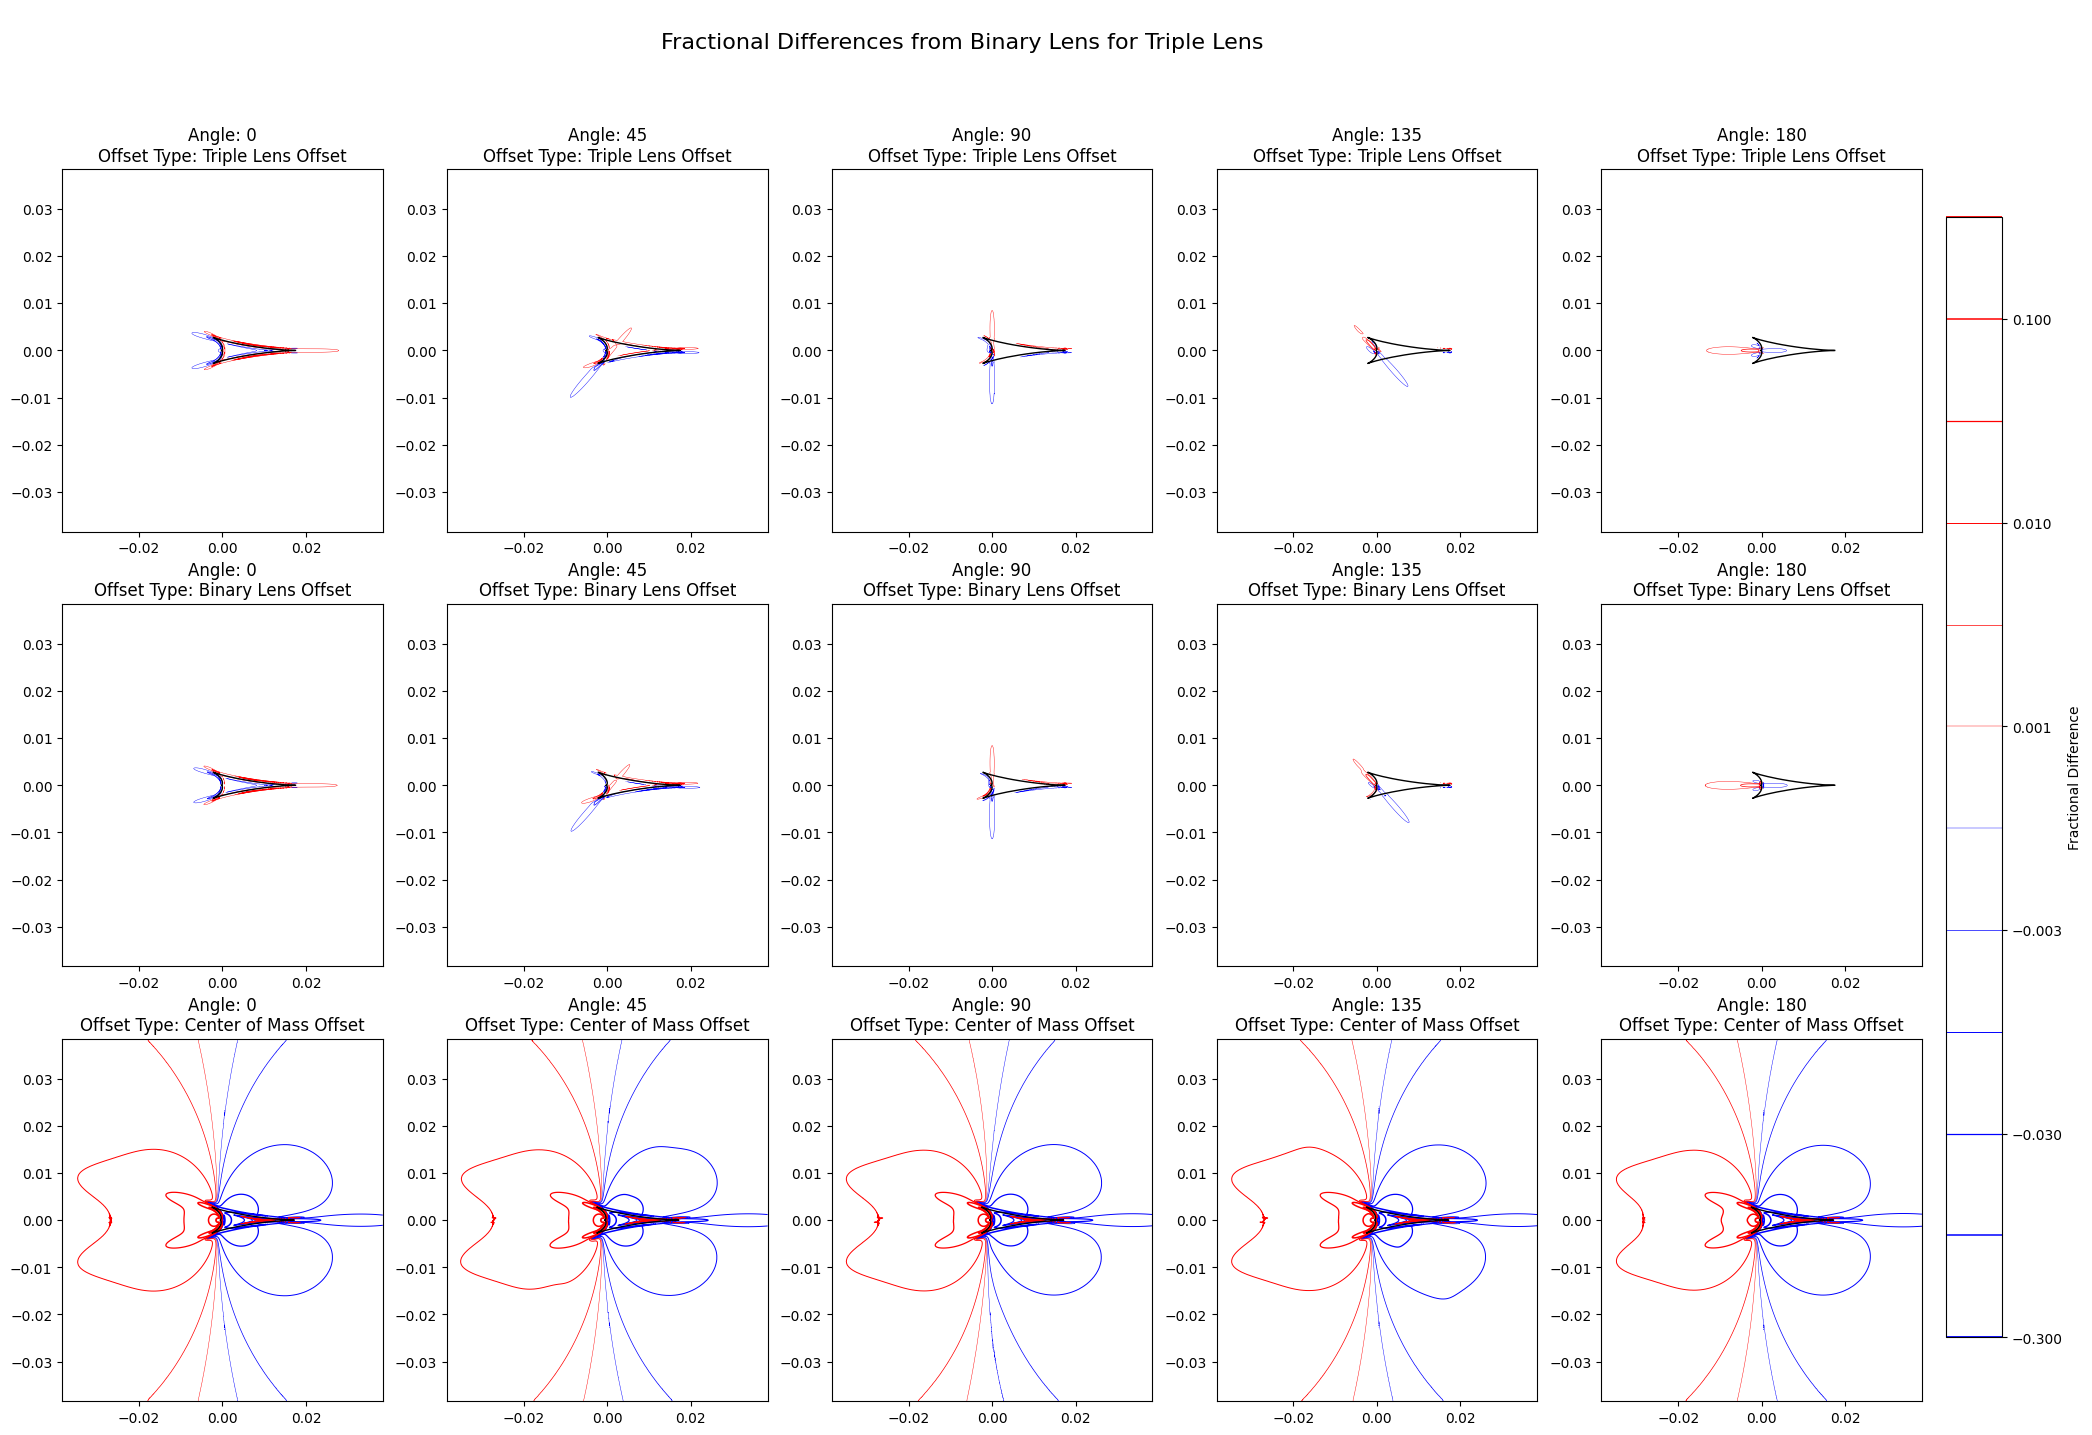

In [30]:
fig = plt.figure(figsize=(24, 16))
all_axes = fig.subplots(3, 5)
axes = all_axes

fig.suptitle('\nFractional Differences from Binary Lens for Triple Lens', fontsize=16)

flat_ind = 0
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if offset_type[i] == '':
            ax.set_title(f'Angle: {alphas[j]}\nOffset Type: Triple Lens Offset')
        elif offset_type[i] == '_binary_offset':
            ax.set_title(f'Angle: {alphas[j]}\nOffset Type: Binary Lens Offset')
        elif offset_type[i] == '_cm':
            ax.set_title(f'Angle: {alphas[j]}\nOffset Type: Center of Mass Offset')

        caustic_points = all_caustic_points[flat_ind]
        for caustic in caustic_points:
            ax.plot(caustic[0], caustic[1], color='black', linewidth=1, zorder=10)

        img = ax.contour(single_lens.X_pix, single_lens.Y_pix, np.flip(fractional_deviation_binary[flat_ind], axis=0),
                levels=[-0.30, -0.10, -0.03, -0.01, -0.003, -0.001, 0.001, 0.003, 0.01, 0.03, 0.10, 0.30],
                colors=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red'],
                linewidths=[1.3, 1.1, 0.9, 0.7, 0.5, 0.3, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3],
                zorder=0
        )

        ax.set_xlim(-ang_width/2, ang_width/2)
        ax.set_ylim(-ang_width/2, ang_width/2)

        flat_ind += 1
        
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar_ax.axis('off')

bar = fig.colorbar(img, ax=cbar_ax, location='right', fraction=1.5, aspect=20)
bar.set_label('Fractional Difference')

# fig.savefig('Fractional Difference Contours Different Offsets.png', dpi=500)

plt.show()

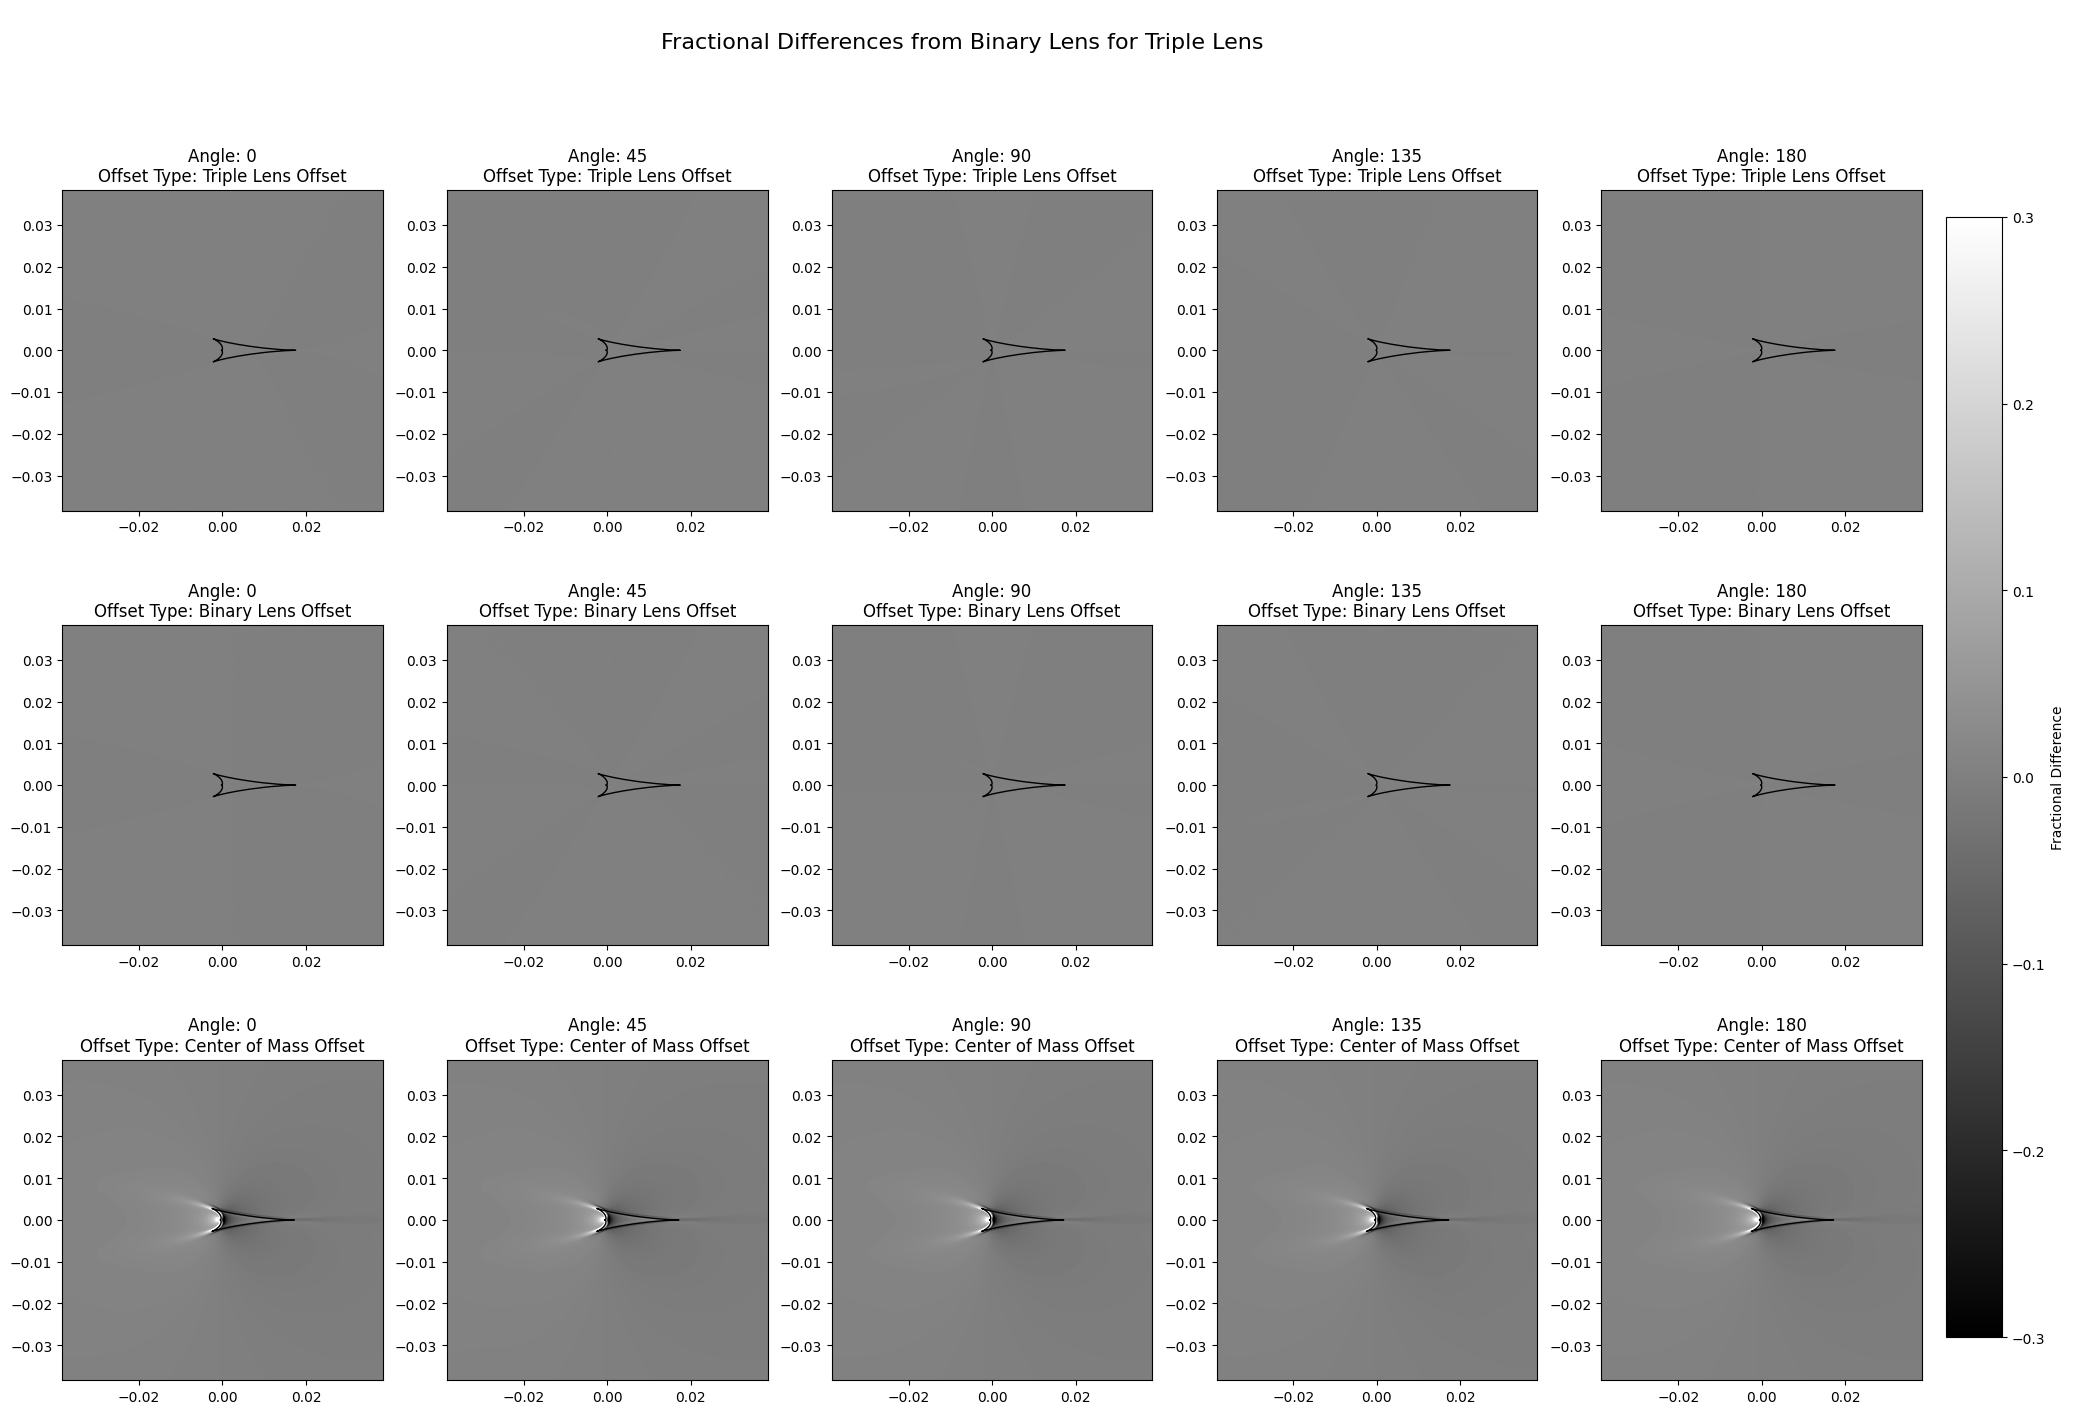

In [31]:
fig = plt.figure(figsize=(24, 16))
all_axes = fig.subplots(3, 5)
axes = all_axes

fig.suptitle('\nFractional Differences from Binary Lens for Triple Lens', fontsize=16)

flat_ind = 0
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if offset_type[i] == '':
            ax.set_title(f'Angle: {alphas[j]}\nOffset Type: Triple Lens Offset')
        elif offset_type[i] == '_binary_offset':
            ax.set_title(f'Angle: {alphas[j]}\nOffset Type: Binary Lens Offset')
        elif offset_type[i] == '_cm':
            ax.set_title(f'Angle: {alphas[j]}\nOffset Type: Center of Mass Offset')

        caustic_points = all_caustic_points[flat_ind]
        for caustic in caustic_points:
            ax.plot(caustic[0], caustic[1], color='black', linewidth=1, zorder=10)
        
        img = ax.imshow(fractional_deviation_binary[flat_ind], cmap='gray', extent=[-ang_width/2, ang_width/2, -ang_width/2, ang_width/2], vmin=-0.3, vmax=0.3)

        ax.set_xlim(-ang_width/2, ang_width/2)
        ax.set_ylim(-ang_width/2, ang_width/2)

        flat_ind += 1
        
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar_ax.axis('off')

bar = fig.colorbar(img, ax=cbar_ax, location='right', fraction=1.5, aspect=20)
bar.set_label('Fractional Difference')

# fig.savefig('Fractional Difference Colormaps Different Offsets.png', dpi=500)

plt.show()